In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('insurance.csv')
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Трансформируем с помощью one hot encoder
train_data = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

one_hot = pd.get_dummies(train_data['sex'], columns='sex', prefix='sex', dtype = int)
train_data[['sex_female', 'sex_male']] = one_hot
train_data = train_data.drop(columns = 'sex')

one_hot = pd.get_dummies(train_data['smoker'], columns='smoker', prefix='smoker', dtype = int)
train_data[['not_smoker', 'is_smoker']] = one_hot
train_data = train_data.drop(columns = 'smoker')

one_hot = pd.get_dummies(train_data['region'], columns='region', prefix='region', dtype = int)
train_data[['reg_sw', 'reg_nw', 'reg_se', 'reg_ne']] = one_hot
train_data = train_data.drop(columns = 'region')

train_data

,age,bmi,children,charges,sex_female,sex_male,not_smoker,is_smoker,reg_sw,reg_nw,reg_se,reg_ne
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
# Делаем копию исходных данных. Затем ещё делим на данные с параметрами и данные с ответами.
# Переделываем данные в матрицу
data_x = train_data.drop(columns='charges')
data_y = train_data.charges
# data_x = pd.DataFrame(data_x)
# data_y = pd.DataFrame(data_y)
data_y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [239]:
"""pd.concat adds the two DataFrames together by appending one right after the other. if there is any overlap, it will be captured by the drop_duplicates method. However, drop_duplicates by default leaves the first observation and removes every other observation. In this case, we want every duplicate removed. Hence, the keep=False parameter which does exactly that.
A special note to the repeated df2. With only one df2 any row in df2 not in df1 won't be considered a duplicate and will remain. This solution with only one df2 only works when df2 is a subset of df1. However, if we concat df2 twice, it is guaranteed to be a duplicate and will subsequently be removed."""
train_x = data_x.sample(frac=0.8, random_state=200) #random_state - это сид рандомайзера
test_x = pd.concat([data_x, train_x, train_x]).drop_duplicates(keep=False)

train_y = data_y.sample(frac=0.8, random_state=200)
test_y = pd.concat([data_y, train_y, train_y]).drop_duplicates(keep=False)

#Разделили на тренируемые и проверяемые
train_x.head(2)



,age,bmi,children,sex_female,sex_male,not_smoker,is_smoker,reg_sw,reg_nw,reg_se,reg_ne
992,50,31.600,2,1,0,1,0,0,0,0,1
937,39,24.225,5,1,0,1,0,0,1,0,0


In [79]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()

In [225]:
#Вес
w = np.zeros(train_x.shape[1])
# Bias
b = 1
# Learning rate
lr = 0.000007

epoch = 100000

def Relu(Z):
    return np.maximum(0, Z)

#Функция ошибки
def MSE(train_y, y_pred):
    MSE = np.mean((train_y - y_pred)**2)
    return MSE

for i in range(epoch):
    y_pred = np.dot(train_x, w) + b  # Перемножаем вектор с параметрами на весы и добавляем биас    
    # y_pred = Relu(y_pred)         
    loss = MSE(train_y, y_pred) 

    #производные веса и биас
    proiz_w = (1 / train_x.shape[1]) *(np.dot(train_x.T, (y_pred-train_y)))
    proiz_b = (1 / train_x.shape[1]) *(np.sum(y_pred-train_y))

    #обновляем веса и биас 
    w -= (lr * proiz_w)
    b -= (lr * proiz_b)
    
    #ERROR
    if (i + 1) % 5000 == 0:
        print(f'Epoch {i + 1}/{epoch}, Loss: {loss}') 


Epoch 5000/100000, Loss: 47691489.266410545
Epoch 10000/100000, Loss: 38704607.21687621
Epoch 15000/100000, Loss: 37663259.12761045
Epoch 20000/100000, Loss: 37530711.85944722
Epoch 25000/100000, Loss: 37511956.523282245
Epoch 30000/100000, Loss: 37509020.72456555
Epoch 35000/100000, Loss: 37508522.378131784
Epoch 40000/100000, Loss: 37508432.623254865
Epoch 45000/100000, Loss: 37508415.62252202
Epoch 50000/100000, Loss: 37508412.15402694
Epoch 55000/100000, Loss: 37508411.320734195
Epoch 60000/100000, Loss: 37508411.04835506
Epoch 65000/100000, Loss: 37508410.922341764
Epoch 70000/100000, Loss: 37508410.84992123
Epoch 75000/100000, Loss: 37508410.80446895
Epoch 80000/100000, Loss: 37508410.77510296
Epoch 85000/100000, Loss: 37508410.75596138
Epoch 90000/100000, Loss: 37508410.74345139
Epoch 95000/100000, Loss: 37508410.73526907
Epoch 100000/100000, Loss: 37508410.7299161


Линейная регрессия


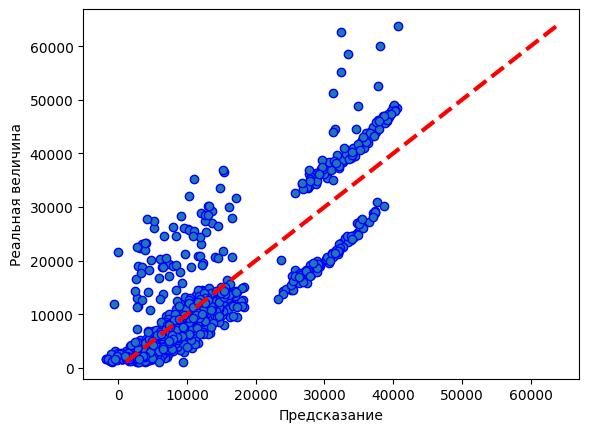

In [226]:
print('Линейная регрессия')
fig, ax = plt.subplots()
ax.scatter(y_pred, train_y, edgecolors=(0, 0, 1))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'r--', lw=3)
ax.set_xlabel('Предсказание')
ax.set_ylabel('Реальная величина')
plt.show()

In [231]:


b = 1
w = np.random.rand(11)

lr = 0.000002

epoch = 50000

def MSE(train_y, y_pred):
    MSE = np.mean((train_y - y_pred)**2)
    return MSE

def Relu(Z):
    return np.maximum(0, Z)


for i in range(epoch):
    #forward
    y_pred = np.dot(train_x, w) + b
    Activation = Relu(y_pred)


    loss = MSE(train_y, y_pred)

    #backward
    m = train_y.size
    #производные веса и биас
    d_activ = Activation - train_y
    d_w = (1/m) * d_activ.dot(Activation.T)
    d_b = (1 /m) * (np.sum(d_activ))

    #обновляем веса и биас 
    w -= (lr * d_w)
    b -= (lr * d_b)
    
    #вывод ошибки
    if (i + 1) % 1000 == 0:
        print(f'Epoch {i + 1}/{epoch}, Loss: {loss}') 

Epoch 1000/50000, Loss: 137644250.85459885
Epoch 2000/50000, Loss: 137644291.429648
Epoch 3000/50000, Loss: 137644332.0003243
Epoch 4000/50000, Loss: 137644372.5666282
Epoch 5000/50000, Loss: 137644413.12856007
Epoch 6000/50000, Loss: 137644453.6861206
Epoch 7000/50000, Loss: 137644494.23931018
Epoch 8000/50000, Loss: 137644534.78812945
Epoch 9000/50000, Loss: 137644575.33257884
Epoch 10000/50000, Loss: 137644615.8726588
Epoch 11000/50000, Loss: 137644656.40836993
Epoch 12000/50000, Loss: 137644696.93971273
Epoch 13000/50000, Loss: 137644737.46668777
Epoch 14000/50000, Loss: 137644777.98929545
Epoch 15000/50000, Loss: 137644818.50753635
Epoch 16000/50000, Loss: 137644859.02141097
Epoch 17000/50000, Loss: 137644899.53091985
Epoch 18000/50000, Loss: 137644940.03606343
Epoch 19000/50000, Loss: 137644980.53684226
Epoch 20000/50000, Loss: 137645021.0332569
Epoch 21000/50000, Loss: 137645061.52530777
Epoch 22000/50000, Loss: 137645102.01299542
Epoch 23000/50000, Loss: 137645142.49632043
Epoc

Линейная регрессия


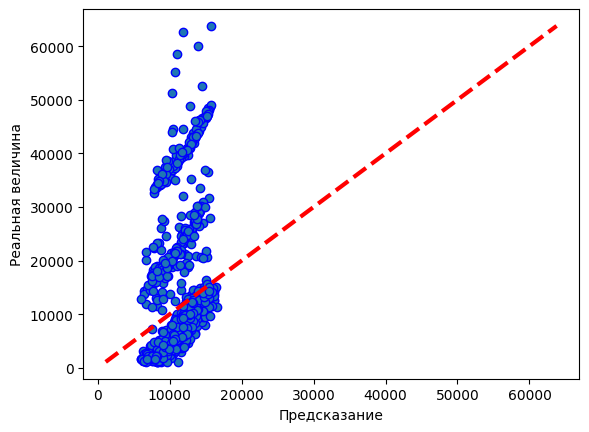

In [232]:
print('Линейная регрессия')
fig, ax = plt.subplots()
ax.scatter(y_pred, train_y, edgecolors=(0, 0, 1))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'r--', lw=3)
ax.set_xlabel('Предсказание')
ax.set_ylabel('Реальная величина')
plt.show()